In [33]:
#Load the required packages
import numpy as np
import pandas as pd

pd.set_option("display.max_rows", 20)
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)

#Read the csv file
dataset=pd.read_csv('data/customers.csv',sep=',')

#Explore the dataset
print(dataset.head()) #top 5 columns
print(len(dataset))  # of rows

#descriptive statistics of the dataset
dataset.describe().transpose()

   INCOME  SPENT
0    2330    150
1    2500    187
2    2040    172
3    2360    178
4    3540    163
303


,count,mean,std,min,25%,50%,75%,max
INCOME,303.0,2452.739274,484.994116,1260.0,2110.0,2400.0,2740.0,4170.0
SPENT,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0


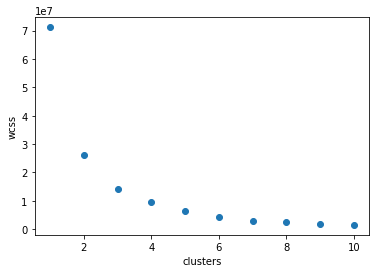

In [34]:
#Using the elbow method to find the optimum number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    # k-means++ initializes the centroids to be (generally) distant from each other, 
    # leading to probably better results than random initialization
    km=KMeans(n_clusters=i,init='k-means++')
    km.fit(dataset)
    # inertia = within cluster some of squares (wcss)
    wcss.append(np.round(km.inertia_).astype('int64'))

wcss = pd.Series(wcss)

# Plot the dataset
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(range(1,11), wcss)
plt.xlabel('clusters')
plt.ylabel('wcss')

plt.show()

   INCOME  SPENT  Cluster
0    2330    150        2
1    2500    187        2
2    2040    172        3
3    2360    178        2
4    3540    163        4


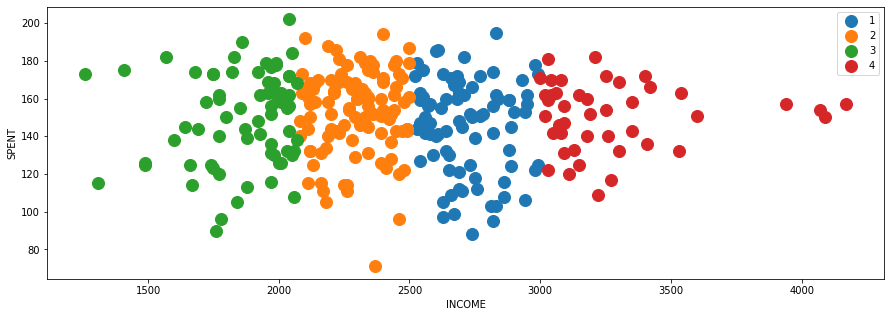

In [35]:
# Based on the elbow plot, we could choose 4,5 or 6 clusters. 
# Let us try 4, 5 and 6 clusters and visualize the clusters to decide on the final number of clusters.
# Fitting kmeans to the dataset with k=4
km4=KMeans(n_clusters=4,init='k-means++')
y_means = km4.fit_predict(dataset)
dataset['Cluster'] = y_means+1
print(dataset.head())

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,5
groups = dataset.groupby('Cluster')
print(groups)
fig,ax = plt.subplots()

for name, group in groups:
    ax.plot(group.INCOME, group.SPENT, marker='o', linestyle='', ms=12, label=name)
    
plt.xlabel('INCOME')
plt.ylabel('SPENT')
    
ax.legend()

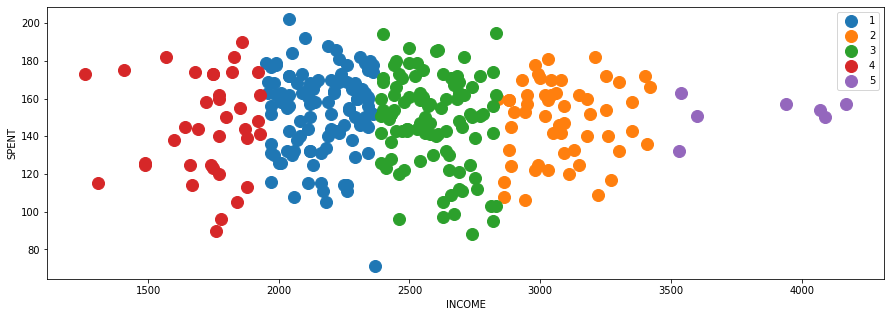

In [36]:
km5=KMeans(n_clusters=5,init='k-means++')
y_means = km5.fit_predict(dataset)
dataset['Cluster'] = y_means + 1

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,5
groups = dataset.groupby('Cluster')
print(groups)
fig,ax = plt.subplots()

for name, group in groups:
    ax.plot(group.INCOME, group.SPENT, marker='o', linestyle='', ms=12, label=name)
    
plt.xlabel('INCOME')
plt.ylabel('SPENT')

ax.legend()

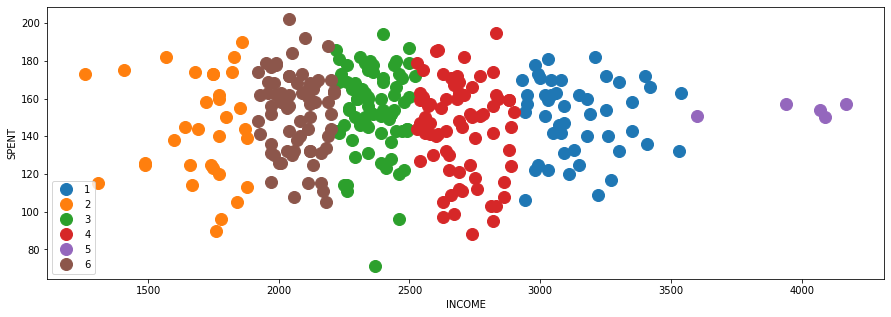

In [37]:
km6=KMeans(n_clusters=6,init='k-means++')
y_means = km6.fit_predict(dataset)
dataset['Cluster'] = y_means + 1

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,5
groups = dataset.groupby('Cluster')
print(groups)
fig,ax = plt.subplots()

for name, group in groups:
    ax.plot(group.INCOME, group.SPENT, marker='o', linestyle='', ms=12, label=name)
    
plt.xlabel('INCOME')
plt.ylabel('SPENT')

ax.legend()

The algorithm continues splitting clusters along the income axis. 
The company might focus its promotional efforts on cluster 5 (high income, relatively low spend)